In [1]:
# Global toolbox
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import scipy.stats as ss
import yfinance as yf

In [2]:
# Data initialization
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 8, 31)
stock_symbols = ['NVDA', 'AMD', 'INTC', 'QCOM', 'AAPL', 'AVGO']
stocks= yf.download(stock_symbols, start_date, end_date)['Adj Close']

[*********************100%***********************]  6 of 6 completed


NVDA:
Mean: 31.73
Variance: 878.66
Skewness: 1.88
Kurtosis: 5.77
AMD:
Mean: 100.65
Variance: 1238.74
Skewness: 0.67
Kurtosis: 2.93
INTC:
Mean: 41.4
Variance: 97.47
Skewness: -0.17
Kurtosis: 1.97
QCOM:
Mean: 126.97
Variance: 935.47
Skewness: 0.31
Kurtosis: 3.42
AAPL:
Mean: 146.76
Variance: 1399.18
Skewness: -0.34
Kurtosis: 2.84
AVGO:
Mean: 63.06
Variance: 1312.74
Skewness: 1.34
Kurtosis: 3.96


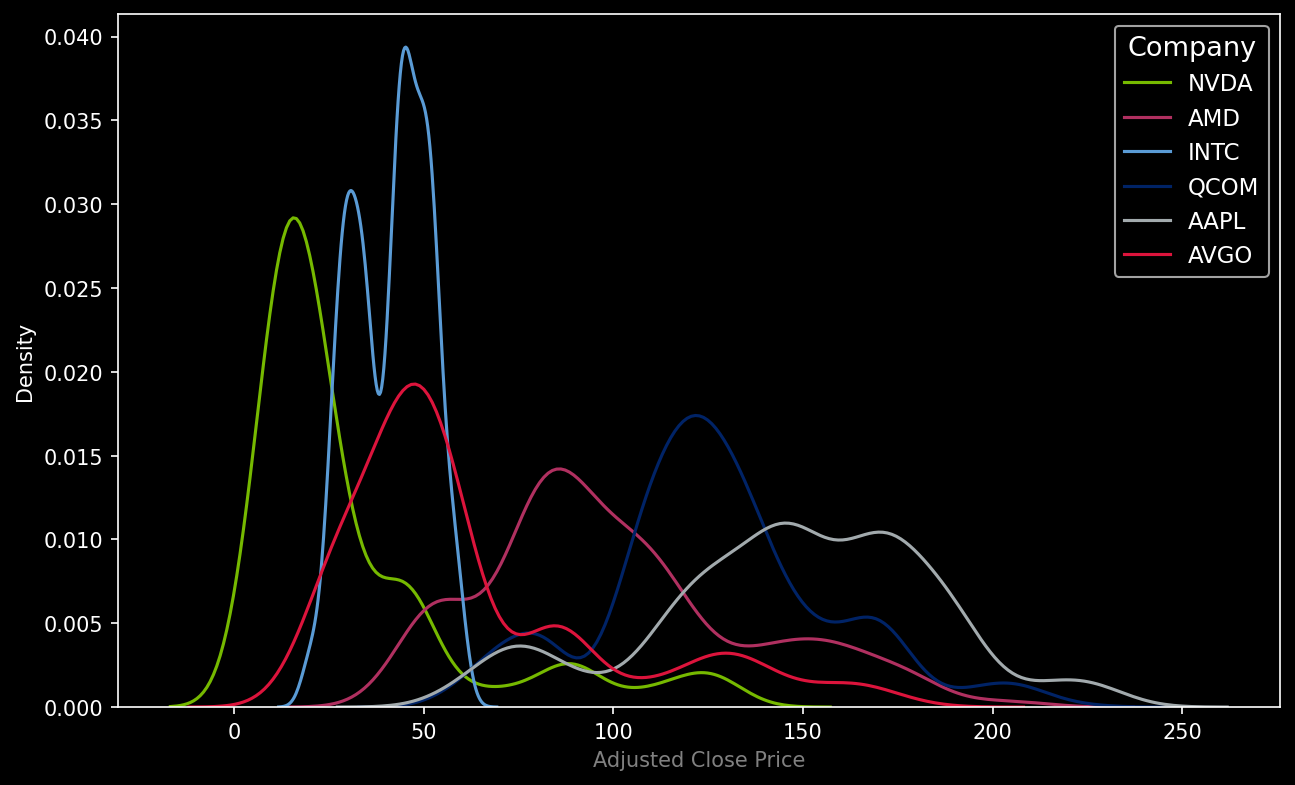

In [3]:
results = pd.DataFrame(columns=['Company', 'Mean', 'Variance', 'Skewness', 'Kurtosis'])
color = ['#76B900', '#B03060', '#5A9BD5', '#002366', '#A2AAAD', '#DC143C']
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
for i in range(len(stock_symbols)): 
    X = stocks[stock_symbols[i]].dropna().values
    mean = round(np.mean(X), 2)
    variance = round(np.var(X), 2)
    skewness = round(ss.skew(X, axis=0, bias=True), 2)
    kurtosis = round(ss.kurtosis(X, axis=0, bias=True) + 3, 2) 
    
    print(f"{stock_symbols[i]}:")
    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")
 
    sns.kdeplot(data=X, linewidth=1.5, label=stock_symbols[i], color=color[i])  

#ax.set_title("Empirical Distributions of Adjusted Close Prices (Jan 2020 - Aug 2024)", color='white')
ax.set_xlabel("Adjusted Close Price", color='grey')  
ax.set_ylabel("Density", color='white')
ax.legend(title="Company", title_fontsize='13', fontsize='11')  



In [4]:
"Bootstrap"
for symbol in stock_symbols:
     X = stocks[symbol].values
     # Bootstrap parameters
     T= X.shape[0]
     B = 1000 # 5000, 100000 [250 9750]
     # using round() instead of int() casting to reduce conversion error
     upper_bound = round(B * 0.975)
     lower_bound = round(B * 0.025)
     mu_boot = np.zeros(B)
     se_boot = np.zeros(B)
     x_boot_std = np.zeros(B)

    # Bootstrap
     for i in range(0, B):
          x_boot = X[np.random.choice(T,T)]
          mu_boot[i] = np.mean(x_boot)
          se_boot[i] = np.std(x_boot)/np.sqrt(T) # std of mu_boot
          x_boot_std[i] = np.std(x_boot) # std of x_boot
          # CLT: std(x_boost) = sqrt(T)*std(mu_boot)
     mu_boot = np.sort(mu_boot)
     se_boot = np.sort(se_boot)
     xboot_std = np.sort(x_boot_std)
    
     print(symbol)
     print("(",round(mu_boot[25], 2),",", 
          round(mu_boot[975], 2),")")
     print("(",round(se_boot[25], 2),",",
          round(se_boot[975], 2),")")
     print("(",round(se_boot[25]*np.sqrt(T), 2),",",
          round(se_boot[975]*np.sqrt(T), 2),")")
     print("(",round(xboot_std[25], 2),",",
          round(xboot_std[975], 2),")")
    

NVDA
( 30.0 , 33.49 )
( 0.8 , 0.92 )
( 27.52 , 31.38 )
( 27.52 , 31.38 )
AMD
( 98.72 , 102.7 )
( 0.99 , 1.07 )
( 33.87 , 36.6 )
( 33.87 , 36.6 )
INTC
( 40.88 , 41.98 )
( 0.28 , 0.3 )
( 9.61 , 10.16 )
( 9.61 , 10.16 )
QCOM
( 125.24 , 128.74 )
( 0.85 , 0.93 )
( 29.22 , 31.83 )
( 29.22 , 31.83 )
AAPL
( 144.54 , 148.67 )
( 1.05 , 1.13 )
( 35.95 , 38.88 )
( 35.95 , 38.88 )
AVGO
( 60.88 , 65.17 )
( 1.0 , 1.11 )
( 34.32 , 38.0 )
( 34.32 , 38.0 )
